<a href="https://colab.research.google.com/github/SmeetHaraniya/SDP-Project/blob/main/SDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch Real Time Stock Price Data

In [ ]:
import yfinance as yf

# Define the ticker symbol
# ticker_symbol = "EIEL.NS"  # Append '.NS' for NSE stocks in India
ticker_symbol = "540190.BO" # Append '.BO' for BSE stocks in India

# Fetch the stock data
stock = yf.Ticker(ticker_symbol)
# print(stock)

# Get the current price
price = stock.history()

print(f"The current price of {ticker_symbol} is: ₹{price}")


The current price of 540190.BO is: ₹                           Open  High   Low  Close    Volume  Dividends  \
Date                                                                      
2024-11-21 00:00:00+05:30  2.24  2.24  2.04   2.23   8887982        0.0   
2024-11-22 00:00:00+05:30  2.30  2.34  2.12   2.13   6708420        0.0   
2024-11-25 00:00:00+05:30  2.20  2.22  2.13   2.17   3790092        0.0   
2024-11-26 00:00:00+05:30  2.23  2.23  2.11   2.14   3111793        0.0   
2024-11-27 00:00:00+05:30  2.18  2.18  2.05   2.08   2710128        0.0   
2024-11-28 00:00:00+05:30  2.12  2.14  2.07   2.11   3224586        0.0   
2024-11-29 00:00:00+05:30  2.15  2.16  2.07   2.12   3542081        0.0   
2024-12-02 00:00:00+05:30  2.16  2.17  2.03   2.12   4005031        0.0   
2024-12-03 00:00:00+05:30  2.14  2.14  2.06   2.09   3258719        0.0   
2024-12-04 00:00:00+05:30  2.11  2.12  2.08   2.11   2659432        0.0   
2024-12-05 00:00:00+05:30  2.13  2.14  2.09   2.12   2279260    

# Predict With Graph


[*********************100%***********************]  1 of 1 completed
<ipython-input-40-9dfccece187f>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill')
<ipython-input-40-9dfccece187f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = data['Close'].fillna(method='ffill')
<ipython-input-40-9dfccece187f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Price          Adj Close         Close          High           Low  \
Ticker     BAJFINANCE.NS BAJFINANCE.NS BAJFINANCE.NS BAJFINANCE.NS   
Date                                                                 
2023-12-20   7456.517578   7493.950195   7695.000000   7460.149902   
2023-12-21   7330.350586   7367.149902   7477.000000   7305.500000   
2023-12-22   7258.859375   7295.299805   7440.000000   7243.000000   
2023-12-26   7126.523926   7162.299805   7344.000000   7145.250000   
2023-12-27   7196.671387   7232.799805   7323.399902   7190.899902   
...                  ...           ...           ...           ...   
2024-12-16   7208.399902   7208.399902   7248.000000   7156.100098   
2024-12-17   7152.799805   7152.799805   7257.399902   7110.000000   
2024-12-18   7074.450195   7074.450195   7178.799805   7060.399902   
2024-12-19   6918.549805   6918.549805   7024.450195   6887.850098   
2024-12-20   6848.250000   6848.250000   7024.000000   6804.700195   

Price              

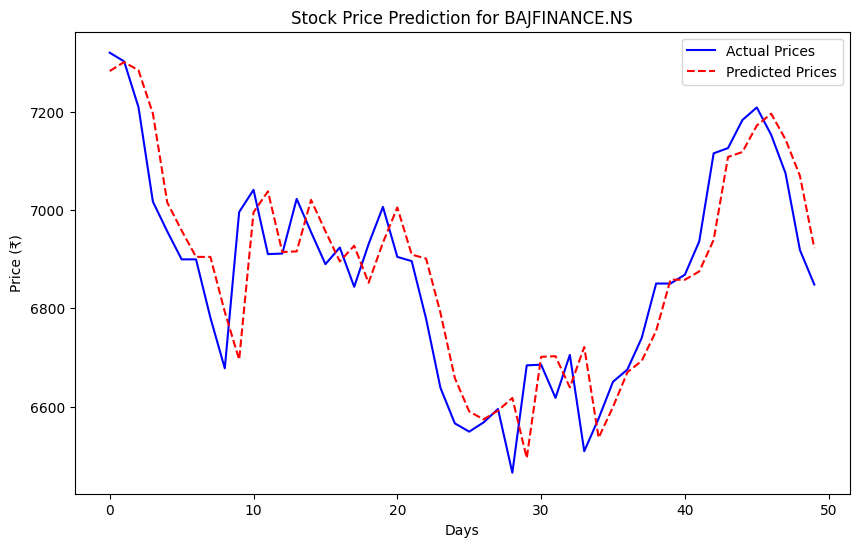

The predicted stock price for the next trading day is: ₹6856.1669261509105


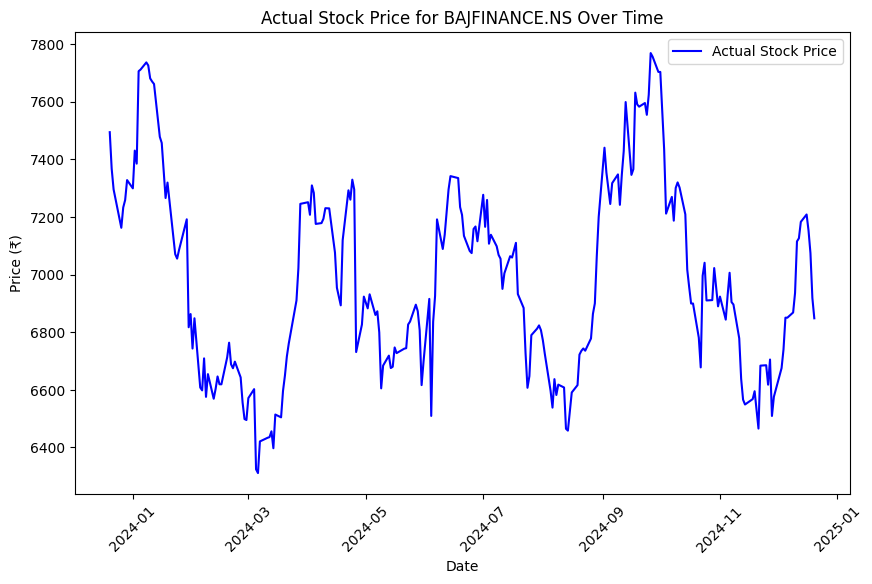

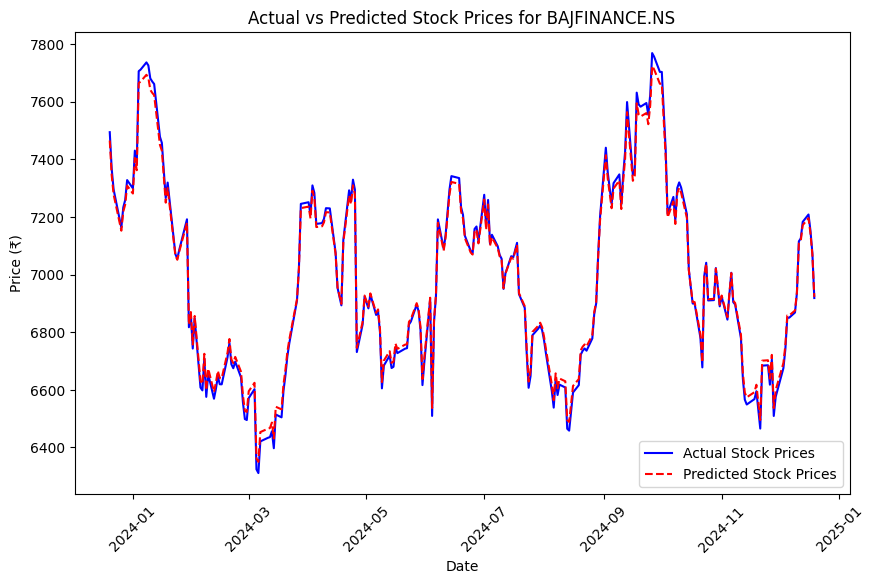

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the ticker symbol for the stock (BSE stock)
ticker_symbol = "BAJFINANCE.NS"  # Example stock (change to the correct one)

# Fetch historical data for the past 1 year (including weekends)
stock_data = yf.download(ticker_symbol, period="1y")

# Display the first few rows
print(stock_data)

# Use the 'Close' price for prediction
data = stock_data[['Close']]

# Fill missing values (if any) using forward fill to handle weekends when markets are closed
data['Close'] = data['Close'].fillna(method='ffill')

# Shift the 'Close' column to create labels (next day's price)
data['Prediction'] = data['Close'].shift(-1)

# Drop the last row as it has no label (NaN)
data = data[:-1]

print(data)

# Define features and labels
X = data[['Close']].values  # Features (previous day's closing price)
y = data['Prediction'].values  # Labels (next day's closing price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the size of the splits
print(f"Training data: {len(X_train)} | Test data: {len(X_test)}")

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values using the test set
predictions = model.predict(X_test)

# Show the first few predictions
print(f"Predictions: {predictions[:5]}")

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Plot the actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Prices", color="blue")
plt.plot(predictions, label="Predicted Prices", color="red", linestyle="--")
plt.title(f"Stock Price Prediction for {ticker_symbol}")
plt.xlabel("Days")
plt.ylabel("Price (₹)")
plt.legend()
plt.show()

# Function to predict for the next trading day
def predict_next_day(model, latest_price):
    # Reshape the latest price to 2D (1 sample, 1 feature)
    latest_price_reshaped = np.array(latest_price).reshape(1, -1)

    # Predict the next day's price using the model
    next_day_prediction = model.predict(latest_price_reshaped)
    return next_day_prediction[0]

# Get the latest closing price
latest_price = stock_data['Close'].iloc[-1]

# Predict the next day's stock price (after filling weekend gaps)
next_day_prediction = predict_next_day(model, latest_price)

print(f"The predicted stock price for the next trading day is: ₹{next_day_prediction}")

# Plot actual stock prices vs. Date (including weekends, with missing data filled)
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label="Actual Stock Price", color="blue")
plt.title(f"Actual Stock Price for {ticker_symbol} Over Time")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot Actual vs Predicted for all available data (including forecasted values)
forecasted_prices = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(stock_data.index[:-1], data['Close'], label="Actual Stock Prices", color="blue")
plt.plot(stock_data.index[:-1], forecasted_prices, label="Predicted Stock Prices", color="red", linestyle="--")
plt.title(f"Actual vs Predicted Stock Prices for {ticker_symbol}")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Predict Next Day Share Price Based On Previous Stock Price Data

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the ticker symbol (example: a BSE stock)
ticker_symbol = "SUZLON.NS"

# Fetch historical stock data up to today (or up to 22/12/2024)
stock_data = yf.download(ticker_symbol)

# Display the first few rows
print(stock_data)

# Use the 'Close' price for prediction
data = stock_data[['Close']]

# Fill missing values using forward fill (for weekends)
data['Close'] = data['Close'].fillna(method='ffill')

# Shift the 'Close' column to create labels (next day's price)
data['Prediction'] = data['Close'].shift(-1)

# Drop the last row (since it doesn't have a prediction)
data = data[:-1]

# Define features (X) and labels (y)
X = data[['Close']].values  # Features: previous day's closing price
y = data['Prediction'].values  # Labels: next day's closing price

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the next day's price using the last known price (22/12/2024)
latest_price = stock_data['Close'].iloc[-1]  # Get the closing price for 22/12/2024

# Reshape the latest price to 2D (1 sample, 1 feature)
latest_price_reshaped = np.array(latest_price).reshape(1, -1)

# Predict the stock price for 23/12/2024
next_day_prediction = model.predict(latest_price_reshaped)

print(f"The predicted stock price for 23/12/2024 is: ₹{next_day_prediction[0]}")


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker       SUZLON.NS   SUZLON.NS   SUZLON.NS   SUZLON.NS   SUZLON.NS   
Date                                                                     
2005-10-19  125.378815  127.236908  128.311218  106.558731  117.347748   
2005-10-20  117.063660  118.798523  129.973190  116.980461  128.733597   
2005-10-21  121.940567  123.747696  127.631744  116.659081  116.659081   
2005-10-24  118.339439  120.093208  126.713524  119.055626  126.162598   
2005-10-25  119.289482  121.057327  121.874542  117.770126  117.770126   
...                ...         ...         ...         ...         ...   
2024-12-16   66.360001   66.360001   68.620003   66.160004   67.500000   
2024-12-17   69.559998   69.559998   69.669998   66.209999   66.360001   
2024-12-18   67.949997   67.949997   70.180000   67.370003   69.800003   
2024-12-19   67.050003   67.050003   68.580002   66.199997   66.500000   
2024-12-20   64.129997   64.129997   6


<ipython-input-49-966b26ab1a2d>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill')
<ipython-input-49-966b26ab1a2d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = data['Close'].fillna(method='ffill')
<ipython-input-49-966b26ab1a2d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data['Close'].shift(-1)
